# Zoo

In [2]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('Zoo.csv')

In [7]:
df.shape

(101, 18)

In [8]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [14]:
df['type'].value_counts(ascending=True)

5     4
3     5
6     8
7    10
4    13
2    20
1    41
Name: type, dtype: int64

In [30]:
y=df['type']

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
KNN=KNeighborsClassifier(n_neighbors=5)

In [58]:
df=pd.get_dummies(df)

In [59]:
df.shape

(101, 117)

In [60]:
x=df.drop(['type'],axis=1)

In [61]:
y.shape

(101,)

In [62]:
KNN.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
KNN.score(x,y)

0.9405940594059405

In [64]:
acc=[]
for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x,y)
    train_acc = np.mean(neigh.predict(x)==y)
    acc.append([train_acc,i])

In [65]:
max(acc)

[0.9801980198019802, 3]

In [67]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Training Accuracy')

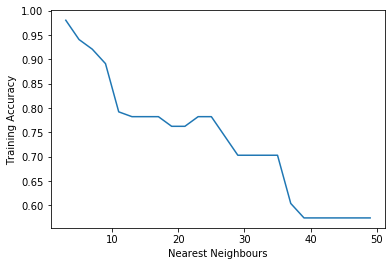

In [75]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc])
plt.xlabel("Nearest Neighbours")
plt.ylabel("Training Accuracy")

# Glass

In [76]:
df=pd.read_csv('glass.csv')

In [77]:
df.shape

(214, 10)

In [78]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [79]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


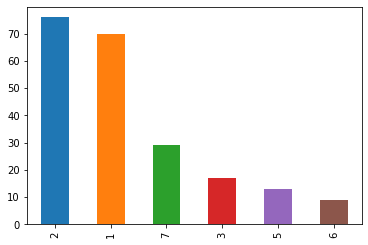

In [80]:
df['Type'].value_counts().plot(kind="bar")

In [86]:
from sklearn.model_selection import train_test_split

In [81]:
Knn=KNeighborsClassifier(n_neighbors=3)

In [82]:
y=df['Type']

In [83]:
x=df.drop(['Type'],axis=1)

In [87]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=51)

In [88]:
Knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [89]:
Knn.score(train_x,train_y)

0.8053691275167785

In [90]:
Knn.score(test_x,test_y)

0.7538461538461538

In [92]:
acc=[]
n_l=[]
for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train_x,train_y)
    train_acc = np.mean(neigh.predict(train_x)==train_y)
    test_acc = np.mean(neigh.predict(test_x)==test_y)
    acc.append([train_acc,test_acc])

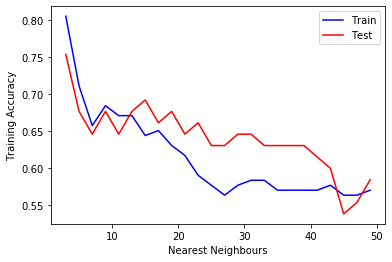

In [95]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],color='Blue')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],color='Red')
plt.xlabel("Nearest Neighbours")
plt.ylabel("Training Accuracy")
plt.legend(["Train","Test"])